<a href="https://colab.research.google.com/github/sanailahii/OIBSIP/blob/main/Car_price_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

file_path = r'C:\Users\hp\Desktop\car data.csv'
if os.path.exists(file_path):
    print("File exists")
else:
    print("File not found")


File not found


In [2]:
file_path = r'C:\Users\hp\Desktop\methods in bdm capstone.txt'
if os.path.exists(file_path):
    print("Test file found")
else:
    print("Test file not found")

Test file not found


In [3]:
file_path = r'C:\Users\hp\Desktop\testfile.txt'
if os.path.exists(file_path):
    print("Test file found")
else:
    print("Test file not found")

Test file not found


In [4]:
file_path = r'C:\testfile.txt'
if os.path.exists(file_path):
    print("Test file found")
else:
    print("Test file not found")


Test file not found


In [5]:
import os
file_path = r'C:\Users\hp\Desktop\testfile.txt'
os.path.exists(file_path)

False

In [6]:
pip install pandas

In [7]:
import pandas as pd

# URL of the CSV file
url = 'https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv'

# Load the data into a DataFrame
df = pd.read_csv(url)

# Display the first few rows of the DataFrame
print(df.head())

# Display basic information about the DataFrame
print(df.info())

# Display basic statistics about the numerical columns
print(df.describe())
print(df.isnull().sum())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [8]:
df.dropna(inplace=True)  # Example: Dropping missing values

In [9]:
df = pd.get_dummies(df, drop_first=True)  # One-hot encoding

In [10]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the specified columns
df[['citympg', 'highwaympg']] = scaler.fit_transform(df[['citympg', 'highwaympg']])

# Print the first few rows of the updated DataFrame to verify the changes
print(df.head())

   car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0       1          3       88.6      168.8      64.1       48.8        2548   
1       2          3       88.6      168.8      64.1       48.8        2548   
2       3          1       94.5      171.2      65.5       52.4        2823   
3       4          2       99.8      176.6      66.2       54.3        2337   
4       5          2       99.4      176.6      66.4       54.3        2824   

   enginesize  boreratio  stroke  ...  cylindernumber_three  \
0         130       3.47    2.68  ...                 False   
1         130       3.47    2.68  ...                 False   
2         152       2.68    3.47  ...                 False   
3         109       3.19    3.40  ...                 False   
4         136       3.19    3.40  ...                 False   

   cylindernumber_twelve  cylindernumber_two  fuelsystem_2bbl  \
0                  False               False            False   
1               

In [12]:
pip install seaborn matplotlib

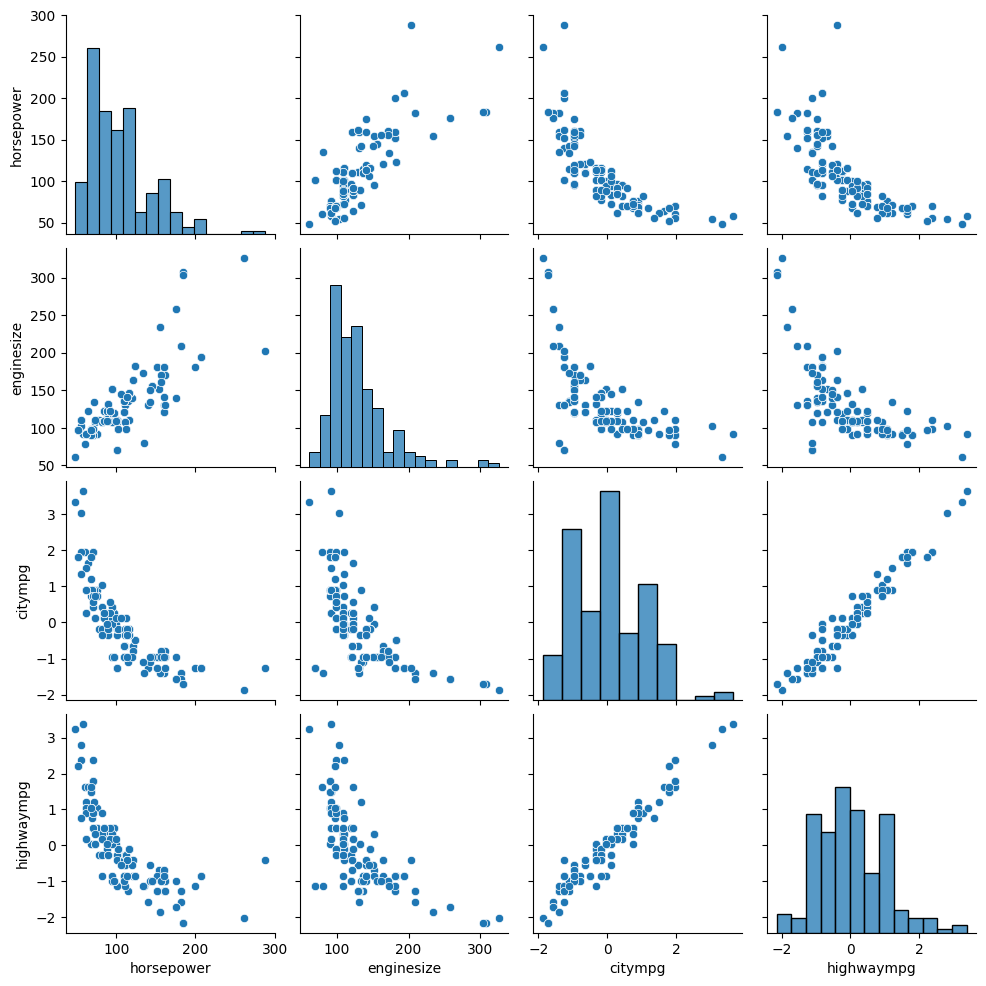

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Subset of columns to plot
columns_to_plot = ['horsepower', 'enginesize', 'citympg', 'highwaympg']

# Plot pairwise relationships for the subset of columns
sns.pairplot(df[columns_to_plot])
plt.show()

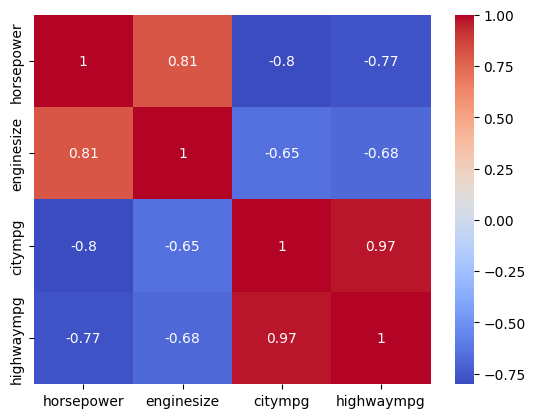

In [17]:
columns_to_include = ['horsepower', 'enginesize', 'citympg', 'highwaympg']
corr = df[columns_to_include].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [19]:
print(df.shape[0])  # Number of rows in the DataFrame

205


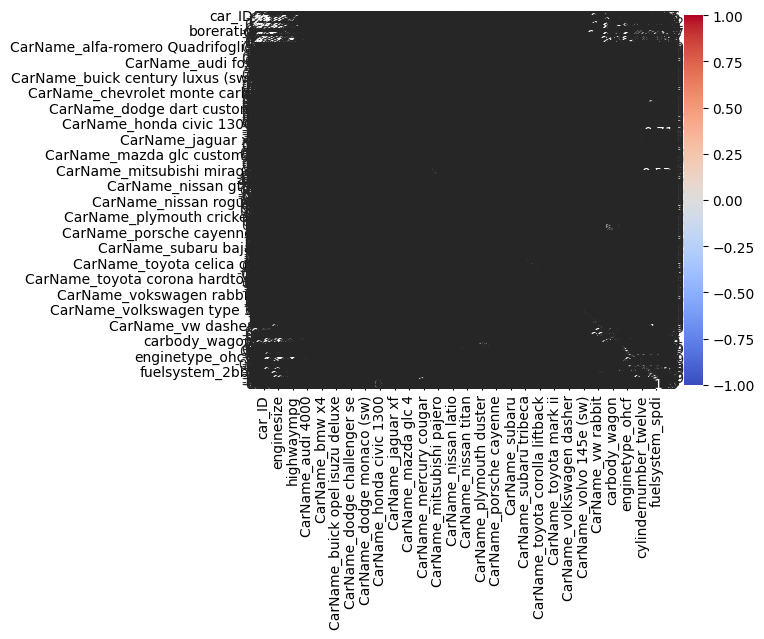

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df.corr()

# Generate a heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

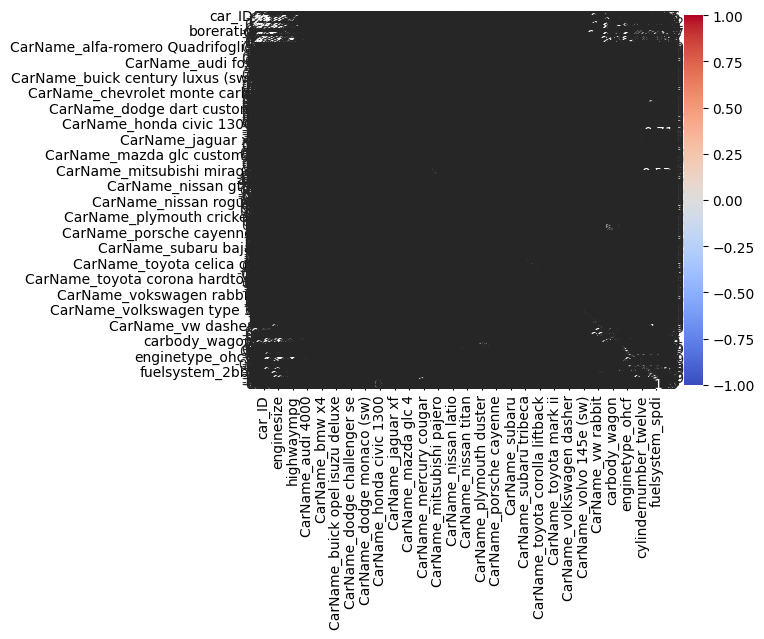

In [22]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [23]:
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = model.predict(X_test)

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

MAE: 7280.66779310929
MSE: 176760096.86054847
R2 Score: -1.2390561677875729
